# 차원 축소, 주성분 분석(PCA, Principal Component Analysis)

# Imports

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 셋

In [2]:
!wget https://bit.ly/fruits_300 -O fruits.npy

--2025-08-20 00:44:07--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-08-20 00:44:08--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-08-20 00:44:08--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443

In [3]:
fruits = np.load('fruits.npy')       # npy 파일을 읽어서 numpy 배열을 생성

In [4]:
fruits.shape        # (samples, width, height)

(300, 100, 100)

In [5]:
def plot_array(arr, ncols= 10):
    n= len(arr)         # 샘플 개수
    nrows = int(np.ceil(n/ ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize= (ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:      # ax는 1차원 ndarray
                if idx < n:     # 샘플이 있는 경우
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:               # ax는 2차원 배열
                if idx < n:
                    ax[i,j].imshow(arr[idx], cmap= plt.cm.binary)
                ax[i,j]. axis('off')
    plt.show()

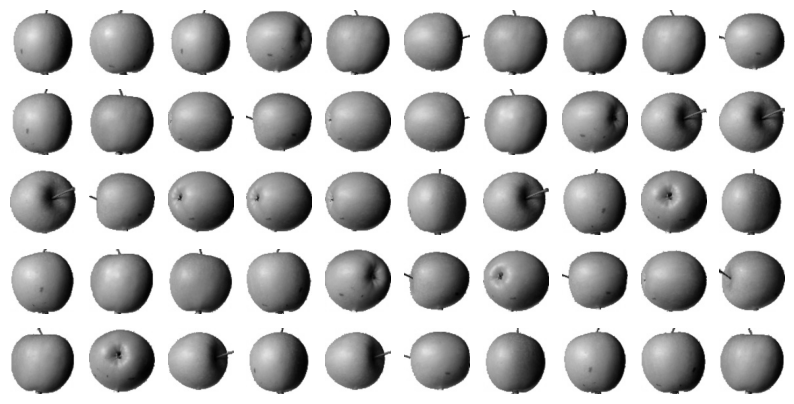

In [6]:
plot_array(fruits[:50])

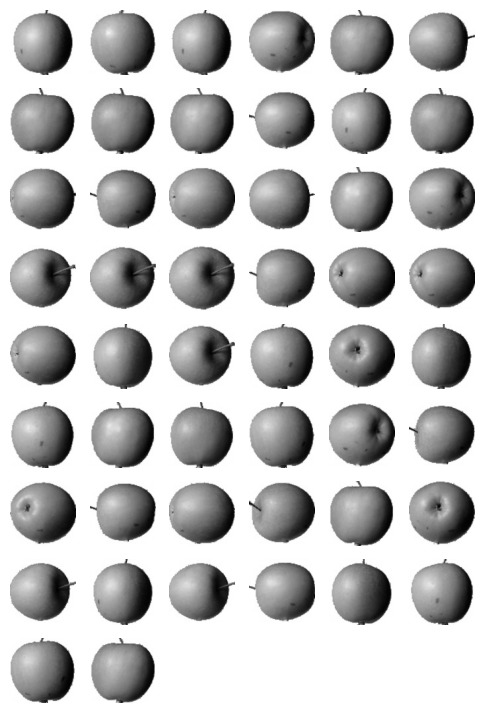

In [7]:
plot_array(fruits[:50], ncols = 6)

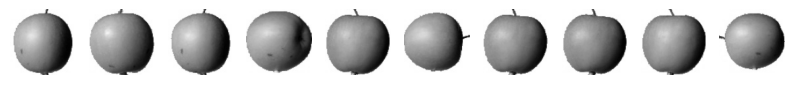

In [8]:
plot_array(fruits[:10])

PCA

주성분 분석
*   훈련 셋에서 분산이 최대가 되는 축을 찾음.
*   첫번째 축과 수직이면서(직교하는)  남은 분산이 최대가 되는 축을 찾음.
*   이전에 찾은 두 축에 모두 수직이면서 남은 분산이 최대가 되는 축을 찾음.
*   위의 과정을 반복.
*   주성분 분석을 사용해서 차원을 축소. 원래 차원으로 재구성할 수도 있음.

In [9]:
# scikit-learn 클래스를 사용하기 위해서 3d array를 2d ndarray로 변환
fruits_2d = fruits.reshape((300, -1))

In [10]:
fruits_2d.shape         # (Samples, pixels)

(300, 10000)

In [11]:
# PCA 클래스 객체 생성
pca = PCA(n_components= 50, random_state= 42)           # 주성분 벡터를 50개 선택.

In [12]:
# 비지도 학습(데이터셋 훈련) --> 50개의 주성분을 찾음.
pca.fit(X= fruits_2d)

PCA(n_components=50, random_state=42)

In [13]:
# PCA에서 찾은 50개의 주성분
pca.components_.shape       #> (n_components, n_features)

(50, 10000)

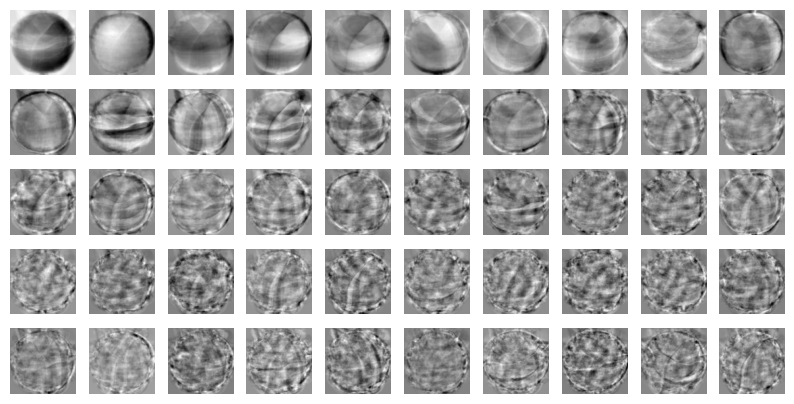

In [14]:
plot_array(pca.components_.reshape((50,100,100)))

## 차원 축소

`PCA.transform()` 메서드 호출.

In [15]:
fruits_2d_reduced = pca.transform(X= fruits_2d)


In [16]:
fruits_2d_reduced.shape         #(n_smaples, n_components)

(300, 50)

## 차원 재구성: 축소됐던 차원을 원래 차원으로 되돌림.

`PCA.inverse_transform()` 메서드 호출.

In [17]:
fruits_2d_reconst = pca.inverse_transform(X= fruits_2d_reduced)

In [18]:
fruits_2d_reconst.shape

(300, 10000)

원본 과일 이미지와 축소했다가 재구성한 이미지를 비교

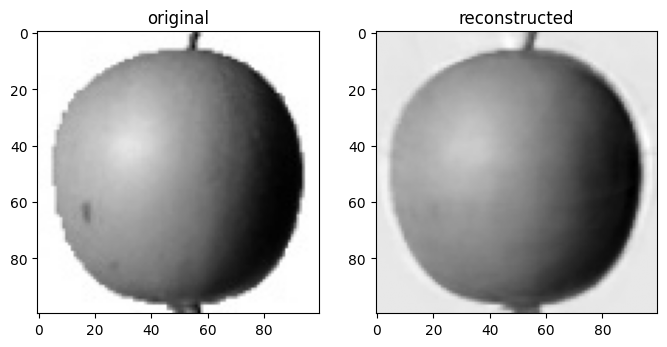

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[0].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

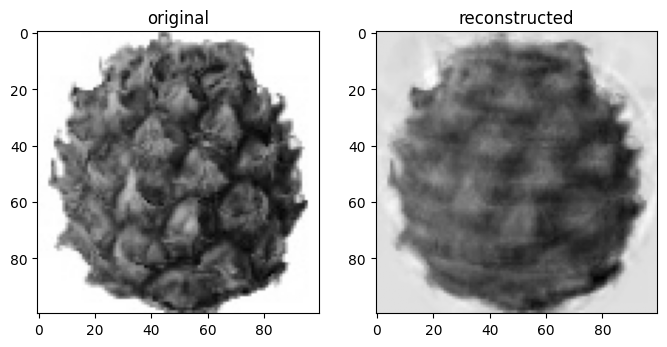

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[100].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

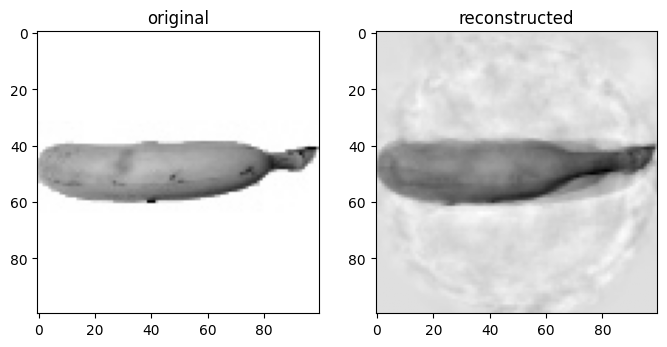

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 원본 이미지
ax[0].imshow(fruits[200], cmap=plt.cm.binary)
ax[0].set_title('original')

# 재구성된 이미지
ax[1].imshow(fruits_2d_reconst[200].reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('reconstructed')

plt.show()

# 설명된 분산 비율(Explained Variance Ratio)

데이터 셋의 분산이 각 주성분 축에 따라 놓여 있는 비율.

In [22]:
pca.explained_variance_         # 설명된 분산

array([13825250.21582   ,  3244970.17261193,  2147002.11072804,
        1315766.76701664,  1115261.57182812,  1071019.42512441,
         839909.3351522 ,   670735.97206957,   447908.41090739,
         438278.50206895,   376058.33742495,   308314.26930361,
         286653.1247086 ,   276360.41324009,   226209.88296423,
         210588.11319902,   188950.25665911,   166854.81151665,
         158753.89250673,   156784.14766241,   146172.9076885 ,
         142739.15925164,   133183.8073018 ,   127118.51886608,
         121563.9978921 ,   117267.70755638,   108186.69143077,
         103713.31379143,    99261.91052115,    99135.70605002,
          94228.05385711,    90040.30447215,    86470.73077457,
          83465.17255061,    82295.02646471,    80663.90690084,
          78094.08591389,    75280.88252636,    72420.27941843,
          70737.72071461,    69455.75778694,    63067.95163101,
          62874.74546014,    62293.2008208 ,    59670.32106508,
          59000.95658326,    55741.88321

In [23]:
pca.explained_variance_ratio_           # 설명된 분산 비율(0~1)

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.005112  , 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408041, 0.00389459, 0.00372441,
       0.00359278, 0.00331456, 0.00317751, 0.00304113, 0.00303726,
       0.00288691, 0.0027586 , 0.00264924, 0.00255716, 0.00252131,
       0.00247134, 0.0023926 , 0.00230641, 0.00221877, 0.00216722,
       0.00212795, 0.00193224, 0.00192632, 0.0019085 , 0.00182815,
       0.00180764, 0.00170779, 0.00166414, 0.00162624, 0.00156195])

In [24]:
np.sum(pca.explained_variance_ratio_)           # 단순 합계

np.float64(0.9213948508475203)

In [25]:
np.cumsum(pca.explained_variance_ratio_)        # 누적 합계

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.81464009,
       0.82109197, 0.82688092, 0.83199293, 0.83685674, 0.8416602 ,
       0.84613856, 0.85051173, 0.85459213, 0.85848672, 0.86221113,
       0.86580391, 0.86911847, 0.87229598, 0.87533711, 0.87837438,
       0.88126128, 0.88401989, 0.88666913, 0.88922629, 0.89174759,
       0.89421893, 0.89661153, 0.89891794, 0.90113672, 0.90330394,
       0.90543188, 0.90736412, 0.90929044, 0.91119895, 0.91302709,
       0.91483473, 0.91654252, 0.91820666, 0.9198329 , 0.92139485])

설명된 분산 비율을 y축으로 그린 선 그래프

In [26]:
x = np.arange(1,51)
y = np.cumsum(pca.explained_variance_ratio_)

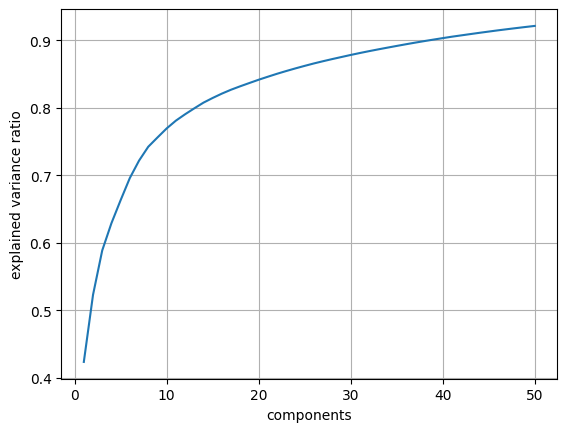

In [27]:
plt.plot(x,y)
plt.xlabel('components')
plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

## 적절한 차원(주성분)의 개수 찾기.

In [28]:
pca2 = PCA()            # n_components 파라미터를 설정하지 않은 PCA 객체 생성

In [29]:
pca2.fit(X= fruits_2d)          # 학습 --> 주성분 찾음.

PCA()

In [30]:
pca2.components_.shape          # PCA로 찾은 주성분 축(Axis) 배열

(300, 10000)

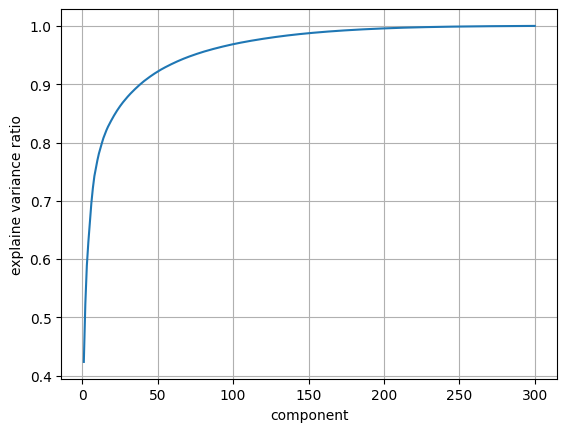

In [31]:
x = np.arange(1, 301)           # PCA로 찾은 주성분 축 배열
y = np.cumsum(pca2.explained_variance_ratio_)           # 설명된 분산 비율들의 누적 합계
plt.plot(x, y)
plt.grid()
plt.xlabel('component')
plt.ylabel('explaine variance ratio')
plt.show()

PCA 객체를 생성할 때 n_components 파라미터를 설명된 분산비율(0.0 ~ 1.0)로 설정할 수도 있음

In [32]:
pca3 = PCA(n_components= 0.95, random_state=42)
pca3.fit(X=fruits_2d)
pca3.components_.shape

(74, 10000)

설명된 분산 비율이 전체 데이터 분산의 95%인 주성분의 개수는 74개.

In [33]:
fruits_2d_reduced = pca3.transform(X= fruits_2d)            # 차원 축소
fruits_2d_reduced.shape

(300, 74)

In [34]:
fruits_2d_reconst = pca3.inverse_transform(X = fruits_2d_reduced)       # 차원 재구성
fruits_2d_reconst.shape

(300, 10000)

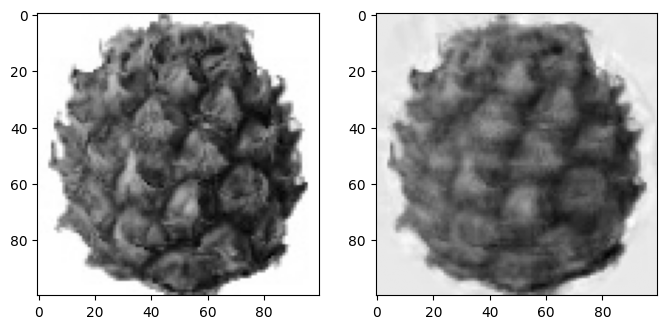

In [35]:

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[1].imshow(fruits_2d_reconst[100].reshape((100, 100)), cmap=plt.cm.binary)
plt.show()


# PCA와 지도학습(분류)


## 차원 축소 없이 분류

In [36]:
# 지도학습에 필요한 타겟 배열
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [37]:
# LogisticRegression을 사용한 분류
%%time
cv = cross_validate(estimator=LogisticRegression(random_state= 42),         # ML 모델
                    X= fruits_2d,           # 특성 배열
                    y=target,               # 타겟 배열
                    return_train_score= True)

CPU times: user 9.2 s, sys: 24.7 ms, total: 9.23 s
Wall time: 4.82 s


In [38]:
type(cv)

dict

In [39]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [40]:
cv['train_score']

array([1., 1., 1., 1., 1.])

In [41]:
np.mean(cv['train_score'])

np.float64(1.0)

In [42]:
cv['test_score']

array([1.        , 1.        , 1.        , 0.98333333, 1.        ])

In [43]:
np.mean(cv['test_score'])

np.float64(0.9966666666666667)

## PCA로 차원 축소한 후 분류

### 95% 설명된 분산 비율

In [44]:
pca = PCA(n_components= 0.95, random_state= 42)

In [45]:
pca.fit(X= fruits_2d)

PCA(n_components=0.95, random_state=42)

In [46]:
pca.n_components_           # PCA가 찾은 주성분 개수

np.int64(74)

In [47]:
fruits_2d_reduced = pca.transform(X= fruits_2d)         # 차원 축소

In [48]:
# 교차 검증
%%time
cv = cross_validate(estimator= LogisticRegression(random_state= 42),
                    X= fruits_2d_reduced,
                    y= target,
                    return_train_score= True)

CPU times: user 332 ms, sys: 125 µs, total: 332 ms
Wall time: 174 ms


In [49]:
np.mean(cv['train_score'])          # 훈련 점수

np.float64(1.0)

In [50]:
np.mean(cv['test_score'])           # 검증 점수

np.float64(0.9966666666666667)

### 50% 설명된 분산 비율

In [51]:
pca = PCA(n_components= 0.5, random_state= 42)

In [52]:
pca.fit(X= fruits_2d)

PCA(n_components=0.5, random_state=42)

In [53]:
pca.n_components_           # PCA가 찾은 주성분 개수

np.int64(2)

In [54]:
# 교차 검증
%%time
cv = cross_validate(estimator= LogisticRegression(random_state= 42),
                    X= fruits_2d_reduced,
                    y= target,
                    return_train_score= True)

CPU times: user 435 ms, sys: 913 µs, total: 435 ms
Wall time: 362 ms


In [55]:
np.mean(cv['train_score'])          # 훈련 점수

np.float64(1.0)

In [56]:
np.mean(cv['test_score'])           # 검증 점수

np.float64(0.9966666666666667)

In [ ]:
####참고해서 더해라

# MNIST PCA

## 데이터 셋

28 x 28 pixel 숫자 손글씨 이미지 70000개

In [69]:
X,y = datasets.fetch_openml(name='mnist_784', return_X_y= True, as_frame= False)                ### 복습

In [70]:
X.shape

(70000, 784)

In [71]:
y.shape

(70000,)

In [72]:
y.dtype             #> 타겟 배열: 문자열들의 배열.

dtype('O')

In [73]:
y = y.astype('int')         # 문자열을 int로 변환('0' -> 0, '1' -> 1,...)
y.dtype

dtype('int64')

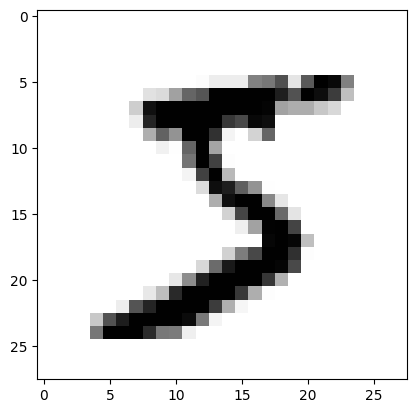

In [74]:
plt.imshow(X[0].reshape((28,28)), cmap= plt.cm.binary)
plt.show()

In [75]:
# 훈련 셋(60000), 테스트 셋 (10000) 분리
X_train, X_test = X[:60_000], X[60_000:]
y_train, y_test = y[:60_000], y[60_000:]

## 차원 축소 없이 Random Forest

In [77]:
# RabdomForestClassifier 객체 생성
rand_forest = RandomForestClassifier(random_state= 42)

In [78]:
# ML 모델 학습
%%time
rand_forest.fit(X=X_train, y= y_train)

CPU times: user 52.2 s, sys: 95.6 ms, total: 52.3 s
Wall time: 52.6 s


RandomForestClassifier(random_state=42)

In [81]:
# 훈련 셋 예측값

%%time
train_pred = rand_forest.predict(X=X_train)


CPU times: user 2.6 s, sys: 25 ms, total: 2.63 s
Wall time: 2.81 s


In [83]:
accuracy_score(y_train, train_pred)         # 훈련 셋의 정확도

1.0

In [84]:
# 테스트 셋 예측값

%%time

test_pred = rand_forest.predict(X= X_test)

CPU times: user 607 ms, sys: 0 ns, total: 607 ms
Wall time: 660 ms


In [86]:
accuracy_score(y_test, test_pred)           # 테스트 셋의 정확도

0.9705

## 차원 축소 후 Random Forest

95% 설명된 분산 비율을 갖도록 PCA 수행.

In [87]:
pca = PCA(n_components= 0.95, random_state= 42)         # PCA 객체 생성

In [88]:
X_train_reduced= pca.fit_transform(X_train)

In [90]:
X_train_reduced.shape               #> (60_000, 784) --> (60_000, 154) 차원 축소됨.

(60000, 154)

In [92]:
rand_forest2 = RandomForestClassifier(random_state= 42)         # ML 모델 생성.

In [93]:
%%time

rand_forest2.fit(X_train_reduced, y_train)

CPU times: user 3min 12s, sys: 336 ms, total: 3min 12s
Wall time: 3min 23s


RandomForestClassifier(random_state=42)

PCA로 차원 축소를 실행하는것이 항상 훈련 속도를 빠르게 하는것은 아니다. 훈련 속도는 데이터 셋과 훈련 알고리즘에 따라서 영향을 받는다.

In [95]:
# 훈련 셋 예측값
%%time
train_pred = rand_forest2.predict(X_train_reduced)

CPU times: user 1.36 s, sys: 6.93 ms, total: 1.37 s
Wall time: 1.43 s


In [98]:
accuracy_score(y_train, train_pred)

1.0

In [106]:
# 테스트 셋 예측값을 찾기 위해서는 훈련셋과 동일하게 차원을 축소해야함.

X_test_reduced = pca.transform(X= X_test)


In [108]:
%%time

test_pred = rand_forest2.predict(X= X_test_reduced)

CPU times: user 454 ms, sys: 986 µs, total: 455 ms
Wall time: 484 ms


In [109]:
accuracy_score(y_test, test_pred)

0.9488

Random Forest인 경우 PCA를 사용한 차원 축소 적용했을 때 모델 성능(정확도)도 떨어짐.

## 차원 축소 없이 SGDClassifier

In [111]:
sgd = SGDClassifier(random_state= 42)

In [112]:
%%time
sgd.fit(X_train, y_train)

CPU times: user 2min 43s, sys: 291 ms, total: 2min 43s
Wall time: 2min 44s


SGDClassifier(random_state=42)

In [114]:
sgd.intercept_

array([ -214.23804761,   -31.47820709,  -243.39283758,  -412.61204135,
        -161.56175199,   103.02146015,  -245.40214746,   -32.70213188,
       -1297.23305113,  -570.06078343])

In [116]:
sgd.coef_.shape

(10, 784)

In [118]:
train_pred = sgd.predict(X_train)           # 훈련 셋 예측값

In [119]:
accuracy_score(train_pred, y_train)

0.8807666666666667

In [121]:
test_pred = sgd.predict(X_test)

In [122]:
accuracy_score(test_pred, y_test)

0.874

## 차원 축소 후 SGDCLassifier

In [123]:
pca = PCA(n_components= 0.95, random_state= 42)

In [124]:
X_train_reduced = pca.fit_transform(X_train)

In [125]:
X_train_reduced.shape

(60000, 154)

In [130]:
pca.n_components_           #> 주성분(principal components) 개수

np.int64(154)

In [133]:
sgd2 = SGDClassifier(random_state=42)

In [135]:
%%time
sgd2.fit(X= X_train_reduced, y= y_train)

CPU times: user 1min 4s, sys: 163 ms, total: 1min 4s
Wall time: 1min 10s


SGDClassifier(random_state=42)

In [136]:
sgd2.intercept_.shape

(10,)

In [137]:
sgd2.coef_.shape

(10, 154)

In [138]:
train_pred = sgd2.predict(X_train_reduced)

In [139]:
accuracy_score(train_pred,y_train)

0.8929

In [140]:
X_test_reduced= pca.transform(X_test)           # 테스트 셋의 차원 축소

In [141]:
X_test_reduced.shape                            # 테스트 셋의 예측값

(10000, 154)

In [143]:
test_pred = sgd2.predict(X_test_reduced)

In [146]:
accuracy_score(test_pred, y_test)

0.8959